In [1]:
import pandas as pd 
import numpy as np

from energy_consumption.feature_selection.extract.extract_energy_data import get_data

In [2]:
energydata = get_data()

100%|██████████| 364/364 [04:07<00:00,  1.47it/s]


In [3]:
from energy_consumption.models.quantreg.quantreg_end import get_QuantRegEndShort_forecasts
from energy_consumption.models.quantreg.quantreg_ex import get_QuantRegExLong_forecasts, get_QuantRegExShort_forecasts

In [33]:
import matplotlib.pyplot as plt
pit_merged = pd.DataFrame(columns=['date_time', 'q0.1', 'q0.2', 'q0.3', 'q0.4', 'q0.5', 'q0.6',
                                   'q0.7', 'q0.8', 'q0.9', 'energy_consumption'])
quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in range(1, 12):
    print(f'start of round {i}')
    forecasts = get_QuantRegEndShort_forecasts(energydata[:i*(-168)],
                                       indexes=list(range(100)),
                                       quantiles=quantiles, abs_eval=True)
    obs = energydata[i*(-168):i*(-168)+100].reset_index()
    forecasts_obs = forecasts.merge(obs, how='left', on='date_time')
    pit_merged = pd.concat([pit_merged, forecasts_obs])

# Insert a column 'q1' with inf values after 'q0.9'
column_index = pit_merged.columns.get_loc('q0.9') + 1
if 'q1' not in pit_merged.columns:
    pit_merged.insert(column_index, 'q1', float('inf'))


def find_first_quantile(row):
    quantile_columns = [f'q{quantile}' for quantile in quantiles]
    for quantile_col in quantile_columns:
        if row['energy_consumption'] < row[quantile_col]:
            return quantile_col
    return 'q1'


# Apply the function to each row
pit_merged['first_quantile'] = pit_merged.apply(find_first_quantile, axis=1)
quantile_counts = pit_merged['first_quantile'].value_counts()
# order quantiles for final plot
ordered_quantile_counts = {}
for q in quantiles:
    if f'q{q}' in quantile_counts.index:
        ordered_quantile_counts[q] = quantile_counts.loc[f'q{q}']
    else:
        ordered_quantile_counts[q] = 0

start of round 1
2017-02-13 00:00:00
2024-01-18 12:00:00
2024-01-17 13:00:00
2024-01-22 16:00:00
start of round 2
2017-02-13 00:00:00
2024-01-11 12:00:00
2024-01-10 13:00:00
2024-01-15 16:00:00


c:\Users\Maria\Documents\Setups\Lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


start of round 3
2017-02-13 00:00:00
2024-01-04 12:00:00
2024-01-03 13:00:00
2024-01-08 16:00:00
start of round 4
2017-02-13 00:00:00
2023-12-28 12:00:00
2023-12-27 13:00:00
2024-01-01 16:00:00
start of round 5
2017-02-13 00:00:00
2023-12-21 12:00:00
2023-12-20 13:00:00
2023-12-25 16:00:00


c:\Users\Maria\Documents\Setups\Lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


start of round 6
2017-02-13 00:00:00
2023-12-14 12:00:00
2023-12-13 13:00:00
2023-12-18 16:00:00
start of round 7
2017-02-13 00:00:00
2023-12-07 12:00:00
2023-12-06 13:00:00
2023-12-11 16:00:00
start of round 8
2017-02-13 00:00:00
2023-11-30 12:00:00
2023-11-29 13:00:00
2023-12-04 16:00:00
start of round 9
2017-02-13 00:00:00
2023-11-23 12:00:00
2023-11-22 13:00:00
2023-11-27 16:00:00


c:\Users\Maria\Documents\Setups\Lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
c:\Users\Maria\Documents\Setups\Lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


start of round 10
2017-02-13 00:00:00
2023-11-16 12:00:00
2023-11-15 13:00:00
2023-11-20 16:00:00
start of round 11
2017-02-13 00:00:00
2023-11-09 12:00:00
2023-11-08 13:00:00
2023-11-13 16:00:00


c:\Users\Maria\Documents\Setups\Lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


In [37]:
# Insert a column 'q1' with inf values after 'q0.9'
column_index = pit_merged.columns.get_loc('q0.9') + 1
if 'q1' not in pit_merged.columns:
    pit_merged.insert(column_index, 'q1', float('inf'))

In [38]:
for q in quantiles:
    if f'q{q}' in quantile_counts.index:
        ordered_quantile_counts[q] = quantile_counts.loc[f'q{q}']
    else:
        ordered_quantile_counts[q] = 0

In [39]:
ordered_quantile_counts

{0.1: 72,
 0.2: 40,
 0.3: 125,
 0.4: 150,
 0.5: 182,
 0.6: 195,
 0.7: 133,
 0.8: 104,
 0.9: 69,
 1: 30}

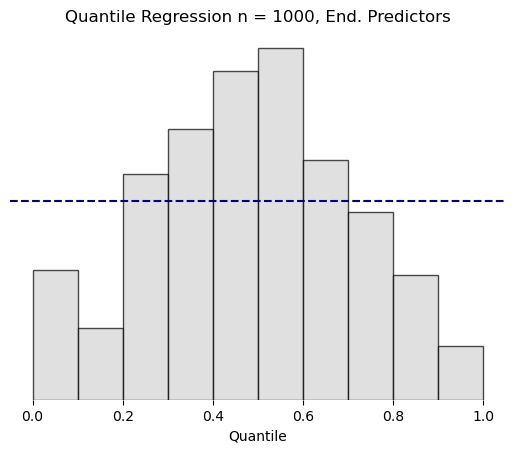

In [40]:
counts = list(ordered_quantile_counts.values())
bar_width = 0.1

quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
# Centering the bars on the left-hand side of their ticks
plt.bar([q - bar_width for q in quantiles], counts,
        width=bar_width, color='lightgrey', alpha=0.7, align='edge', edgecolor='black')

# Calculate the mean of the y-values
mean_value = sum(counts) / len(counts)
plt.axhline(y=mean_value, color='darkblue', linestyle='--', label='Mean')
plt.xlabel('Quantile')
plt.yticks([])
# Alternatively: observed counts in each quantile range
plt.title('Quantile Regression n = 1000, End. Predictors')
plt.box(False)
plt.show()

In [11]:
pit_merged

,date_time,q0.1,q0.2,q0.3,q0.4,q0.5,q0.6,q0.7,q0.8,q0.9,q1,energy_consumption,first_quantile
0,2024-01-17 13:00:00,67.477496,70.031557,70.427966,71.076425,71.725251,73.083608,73.914599,74.690310,74.854638,inf,71.60325,q0.5
1,2024-01-17 14:00:00,66.321045,69.219174,69.843965,70.882925,71.516929,72.311108,73.175901,73.638190,74.502062,inf,70.62675,q0.4
2,2024-01-17 15:00:00,66.321045,69.219174,69.843965,70.882925,71.516929,72.311108,73.175901,73.638190,74.502062,inf,69.26850,q0.3
3,2024-01-17 16:00:00,66.321045,69.219174,69.843965,70.882925,71.516929,72.311108,73.175901,73.638190,74.502062,inf,69.43150,q0.3
4,2024-01-17 17:00:00,66.321045,69.219174,69.843965,70.882925,71.516929,72.311108,73.175901,73.638190,74.502062,inf,71.15625,q0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,2023-11-11 16:00:00,50.684042,51.711463,52.639446,53.386571,54.391699,55.210969,56.092539,57.615659,58.446173,inf,53.56700,q0.5
76,2023-11-11 17:00:00,50.684042,51.711463,52.639446,53.386571,54.391699,55.210969,56.092539,57.615659,58.446173,inf,56.28250,q0.8
77,2023-11-11 18:00:00,50.684042,51.711463,52.639446,53.386571,54.391699,55.210969,56.092539,57.615659,58.446173,inf,56.33500,q0.8
78,2023-11-11 19:00:00,50.684042,51.711463,52.639446,53.386571,54.391699,55.210969,56.092539,57.615659,58.446173,inf,54.33125,q0.5


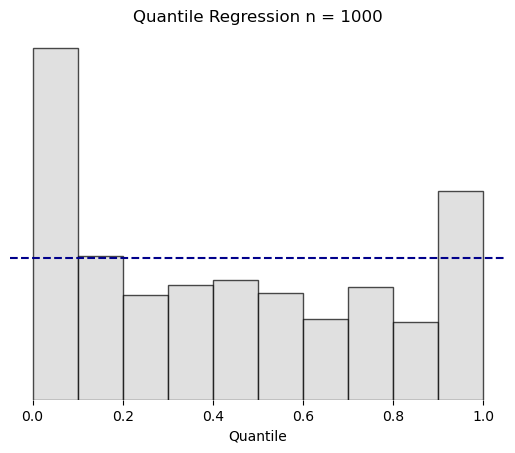

In [13]:
def find_first_quantile(row):
    quantile_columns = [f'q{quantile}' for quantile in quantiles]
    for quantile_col in quantile_columns:
        if row['energy_consumption'] < row[quantile_col]:
            return quantile_col
    return 'q1'


# Apply the function to each row
pit_merged['first_quantile'] = pit_merged.apply(find_first_quantile, axis=1)
quantile_counts = pit_merged['first_quantile'].value_counts()

# order quantiles for final plot
ordered_quantile_counts = {}
for q in quantiles:
    if f'q{q}' in quantile_counts.index:
        ordered_quantile_counts[q] = quantile_counts.loc[f'q{q}']
    else:
        ordered_quantile_counts[q] = 0

counts = list(ordered_quantile_counts.values())
bar_width = 0.1

quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
# Centering the bars on the left-hand side of their ticks
plt.bar([q - bar_width for q in quantiles], counts,
        width=bar_width, color='lightgrey', alpha=0.7, align='edge', edgecolor='black')

# Calculate the mean of the y-values
mean_value = sum(counts) / len(counts)
plt.axhline(y=mean_value, color='darkblue', linestyle='--', label='Mean')
plt.xlabel('Quantile')
plt.yticks([])
# Alternatively: observed counts in each quantile range
plt.title('Quantile Regression n = 1000')
plt.box(False)
plt.show()

In [26]:
import matplotlib.pyplot as plt
pit_merged = pd.DataFrame(columns=['date_time', 'q0.1', 'q0.2', 'q0.3', 'q0.4', 'q0.5', 'q0.6',
                                   'q0.7', 'q0.8', 'q0.9', 'energy_consumption'])
quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in range(1, 12):
    print(f'start of round {i}')
    forecasts = get_QuantRegExLong_forecasts(energydata[:i*(-168)],
                                               indexes=list(range(100)),
                                               quantiles=quantiles, abs_eval=True)
    obs = energydata[i*(-168):i*(-168)+100].reset_index()
    forecasts_obs = forecasts.merge(obs, how='left', on='date_time')
    pit_merged = pd.concat([pit_merged, forecasts_obs])

# Insert a column 'q1' with inf values after 'q0.9'
column_index = pit_merged.columns.get_loc('q0.9') + 1

start of round 1
2017-02-13 00:00:00
2024-01-18 12:00:00
2024-01-17 13:00:00
2024-01-22 16:00:00
start of round 2
2017-02-13 00:00:00
2024-01-11 12:00:00
2024-01-10 13:00:00
2024-01-15 16:00:00
start of round 3
2017-02-13 00:00:00
2024-01-04 12:00:00
2024-01-03 13:00:00
2024-01-08 16:00:00
start of round 4
2017-02-13 00:00:00
2023-12-28 12:00:00
2023-12-27 13:00:00
2024-01-01 16:00:00
start of round 5
2017-02-13 00:00:00
2023-12-21 12:00:00
2023-12-20 13:00:00
2023-12-25 16:00:00
start of round 6
2017-02-13 00:00:00
2023-12-14 12:00:00
2023-12-13 13:00:00
2023-12-18 16:00:00


c:\Users\Maria\Documents\Setups\Lib\site-packages\statsmodels\regression\quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


start of round 7
2017-02-13 00:00:00
2023-12-07 12:00:00
2023-12-06 13:00:00
2023-12-11 16:00:00
start of round 8
2017-02-13 00:00:00
2023-11-30 12:00:00
2023-11-29 13:00:00
2023-12-04 16:00:00
start of round 9
2017-02-13 00:00:00
2023-11-23 12:00:00
2023-11-22 13:00:00
2023-11-27 16:00:00
start of round 10
2017-02-13 00:00:00
2023-11-16 12:00:00
2023-11-15 13:00:00
2023-11-20 16:00:00
start of round 11
2017-02-13 00:00:00
2023-11-09 12:00:00
2023-11-08 13:00:00
2023-11-13 16:00:00


In [29]:
# Insert a column 'q1' with inf values after 'q0.9'
column_index = pit_merged.columns.get_loc('q0.9') + 1
if 'q1' not in pit_merged.columns:
    pit_merged.insert(column_index, 'q1', float('inf'))

In [30]:
def find_first_quantile(row):
    quantile_columns = [f'q{quantile}' for quantile in quantiles]
    for quantile_col in quantile_columns:
        if row['energy_consumption'] < row[quantile_col]:
            return quantile_col
    return 'q1'


# Apply the function to each row
pit_merged['first_quantile'] = pit_merged.apply(find_first_quantile, axis=1)
quantile_counts = pit_merged['first_quantile'].value_counts()

# order quantiles for final plot
ordered_quantile_counts = {}
for q in quantiles:
    if f'q{q}' in quantile_counts.index:
        ordered_quantile_counts[q] = quantile_counts.loc[f'q{q}']
    else:
        ordered_quantile_counts[q] = 0

counts = list(ordered_quantile_counts.values())
counts

[198, 170, 142, 123, 122, 91, 73, 36, 30, 115]

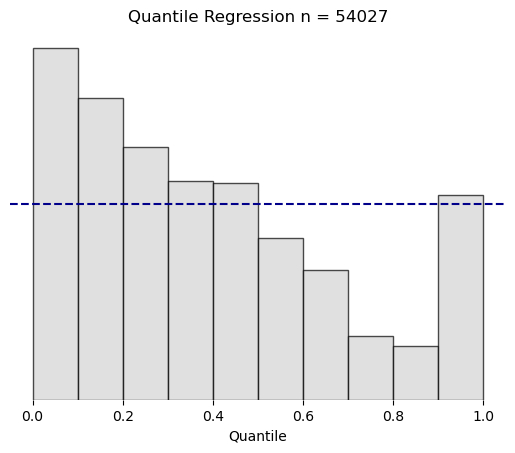

In [32]:
bar_width = 0.1

quantiles = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
# Centering the bars on the left-hand side of their ticks
plt.bar([q - bar_width for q in quantiles], counts,
        width=bar_width, color='lightgrey', alpha=0.7, align='edge', edgecolor='black')

# Calculate the mean of the y-values
mean_value = sum(counts) / len(counts)
plt.axhline(y=mean_value, color='darkblue', linestyle='--', label='Mean')
plt.xlabel('Quantile')
plt.yticks([])
# Alternatively: observed counts in each quantile range
plt.title('Quantile Regression n = 54027')
plt.box(False)
plt.show()